In [3]:
import numpy as np
import pandas as pd
df_churn=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
df_churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df_churn.drop("RowNumber",axis=1,inplace=True)

In [6]:
df_churn.drop("CustomerId",axis=1,inplace=True)
df_churn


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
d={"Male":0, "Female":1}
df_churn["Gender"]=df_churn["Gender"].map(d)

In [8]:
features=["CreditScore","Age","Tenure","Balance","HasCrCard","IsActiveMember","EstimatedSalary"]
x=df_churn[features]
y=df_churn["Exited"]

In [9]:
from sklearn.preprocessing import LabelEncoder
for col in df_churn.columns:
  le=LabelEncoder()
  df_churn[col]=le.fit_transform(df_churn[col])
df_churn

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,228,0,1,24,2,0,0,1,1,5068,1
1,1177,217,2,1,23,1,743,0,0,1,5639,0
2,2040,111,0,1,24,8,5793,2,1,0,5707,1
3,289,308,0,1,21,1,0,1,0,0,4704,0
4,1822,459,2,1,25,2,3696,0,1,1,3925,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1999,380,0,0,21,5,0,1,1,0,4827,0
9996,1336,125,0,0,17,10,124,0,1,1,5087,0
9997,1570,318,0,1,18,7,0,0,0,1,2062,1
9998,2345,381,1,0,24,3,427,1,1,0,4639,1


In [10]:
from sklearn.feature_selection import chi2
chi_scores=chi2(x,y)
chi_scores

(array([1.05403468e+02, 2.30041748e+03, 3.27053797e+00, 7.15130278e+06,
        1.50040970e-01, 1.18199414e+02, 4.83508818e+04]),
 array([9.96353608e-25, 0.00000000e+00, 7.05344899e-02, 0.00000000e+00,
        6.98496209e-01, 1.56803624e-27, 0.00000000e+00]))

<Axes: >

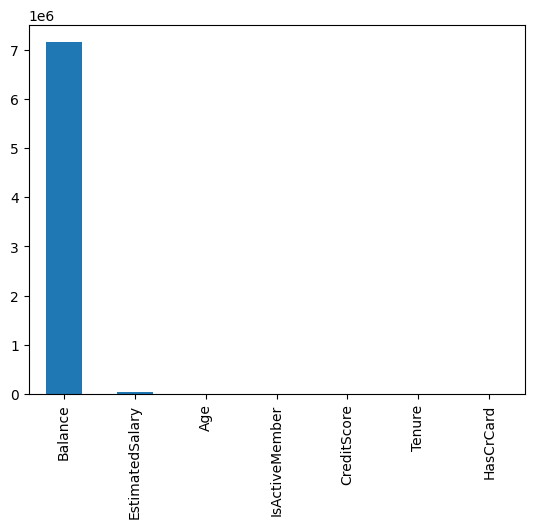

In [11]:
chi_values=pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

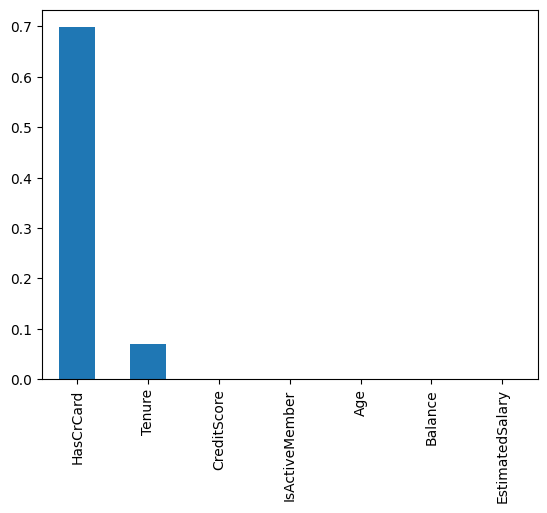

In [12]:
p_values=pd.Series(chi_scores[1],index=x.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

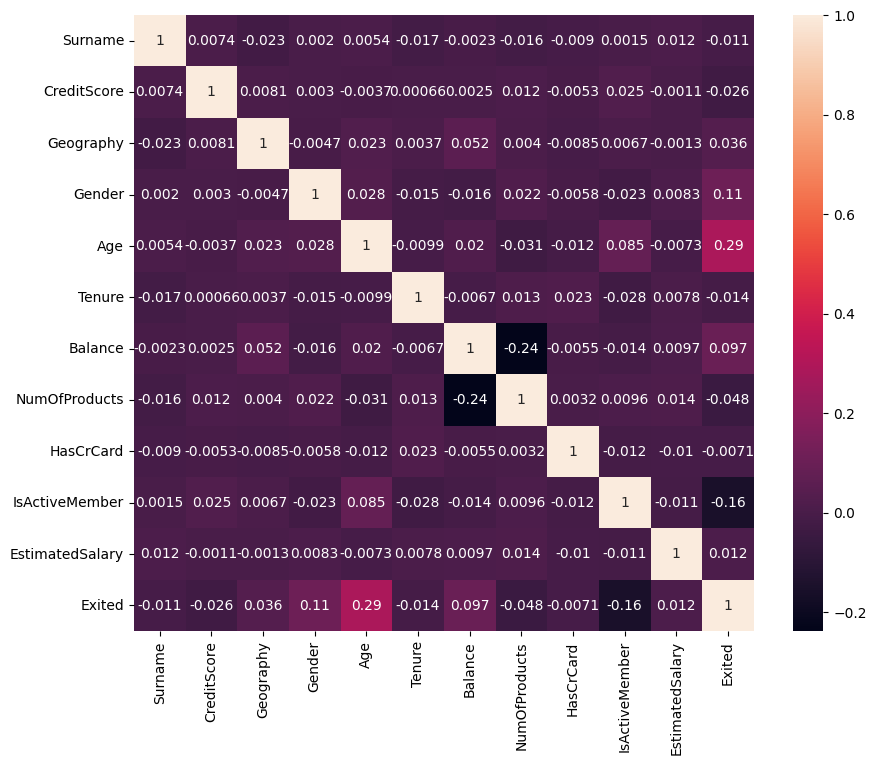

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df_churn.corr(), annot=True)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

exit = df_churn[df_churn.Exited==0]
X_over, X_under, y_over, y_under = train_test_split(exit, exit.Exited, test_size = 0.3)
X_under.shape
X_under['Exited'] = y_under

In [17]:
final= pd.concat([df_churn[df_churn.Exited == 1], X_under])
final.Exited.value_counts()

0    2389
1    2037
Name: Exited, dtype: int64